In [ ]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the data

data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')
m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel()})    # TTF and TSF not used
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})  # 7 features
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})   
df = a_t.merge(m_t, on='Time')

xdf1 = df.drop(['SS', 'Time'], axis=1)
#xdf1 = df[{'A_filt', 'T_pc', 'T_der'}]
#xdf1 = df[{'V_filt', 'Vel_pc', 'Vel_der'}]

ydf = df['SS']

print("Features:\n", xdf1)
print("Shear stress:\n", ydf)


Features:
              A_filt       V_filt  T_pc  Vel_pc  T_der  Vel_der
0       1804.180000  5489.978529   0.0     0.0    0.0      0.0
1       1803.666667  5489.981454   0.0     0.0    0.0      0.0
2       1803.314286  5489.997639   0.0     0.0    0.0      0.0
3       1803.437500  5490.007016   0.0     0.0    0.0      0.0
4       1803.266667  5490.000189   0.0     0.0    0.0      0.0
...             ...          ...   ...     ...    ...      ...
132394  1784.250000  5459.380488   0.0     0.0   -0.0     -0.0
132395  1784.055556  5459.377762   0.0     0.0   -0.0     -0.0
132396  1783.837500  5459.388352   0.0     0.0   -0.0     -0.0
132397  1783.371429  5459.398820   0.0     0.0   -0.0     -0.0
132398  1781.433333  5459.399041   0.0     0.0   -0.0     -0.0

[132399 rows x 6 columns]
Shear stress:
 0         5.656166
1         5.657157
2         5.658317
3         5.659499
4         5.660404
            ...   
132394    5.471059
132395    5.474545
132396    5.478286
132397    5.481751
1

In [ ]:
# Split into train-val-test

x_train, x_test, y_train, y_test = train_test_split(xdf1, ydf, test_size=0.2, shuffle=False)   
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=False)
print("Training:", np.shape(X_train))
print("Validation:", np.shape(X_val))
print("Testing:", np.shape(x_test))


Training: (95327, 6)
Validation: (10592, 6)
Testing: (26480, 6)


In [ ]:
# Train the model
model = XGBRegressor(colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=1000, objective='reg:squarederror')
model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], verbose=False, early_stopping_rounds = 20)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluate the model
y_predTrain = model.predict(X_train)
train_r2 = r2_score(Y_train, y_predTrain)
train_rmse = np.sqrt(mean_squared_error(Y_train, y_predTrain))

y_predVal = model.predict(X_val)
val_r2 = r2_score(Y_val, y_predVal)
val_rmse = np.sqrt(mean_squared_error(Y_val, y_predVal))  

y_predTest = model.predict(x_test)
test_r2 = r2_score(y_test, y_predTest)
test_rmse = np.sqrt(mean_squared_error(y_test, y_predTest))

print("R^2 scores: ", train_r2, val_r2, test_r2)
print("RMSE: ", train_rmse, val_rmse, test_rmse)


R^2 scores:  0.9322065035351066 0.9324876269526574 0.8779168910738201
RMSE:  0.0334647769747971 0.03799241843485011 0.05060362897989584


Text(0.5, 1.0, 'Testing data')

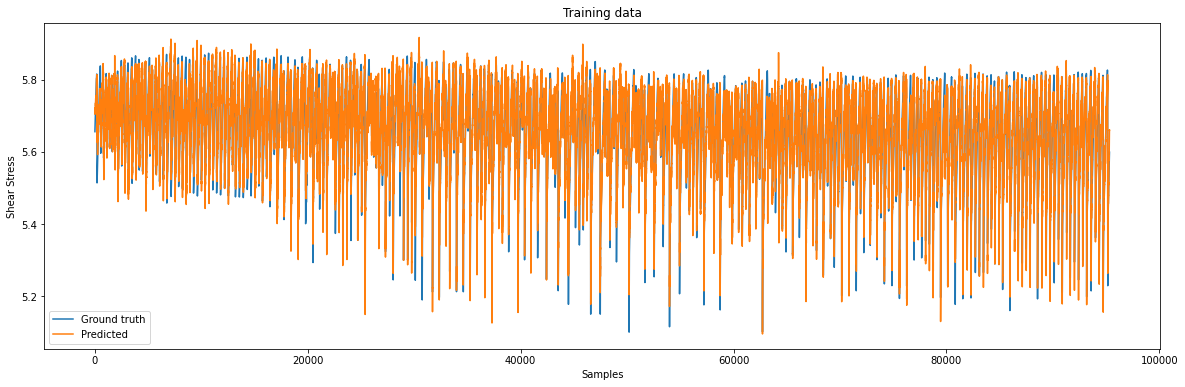

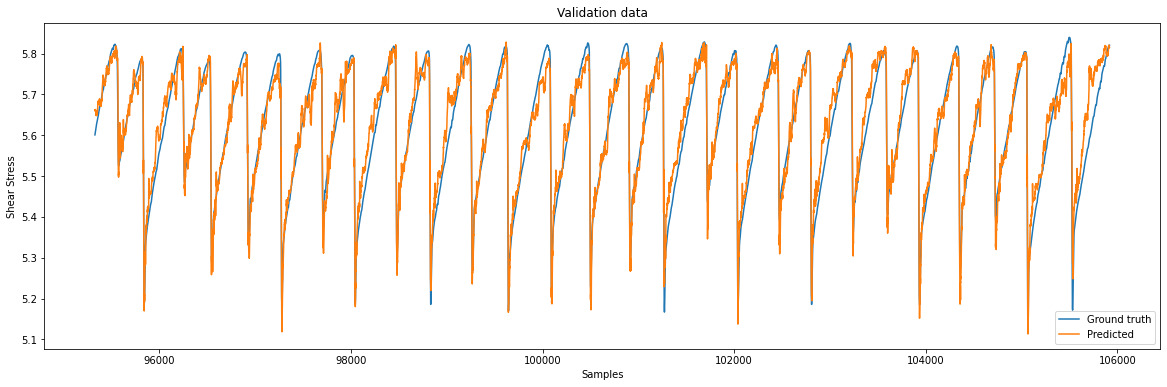

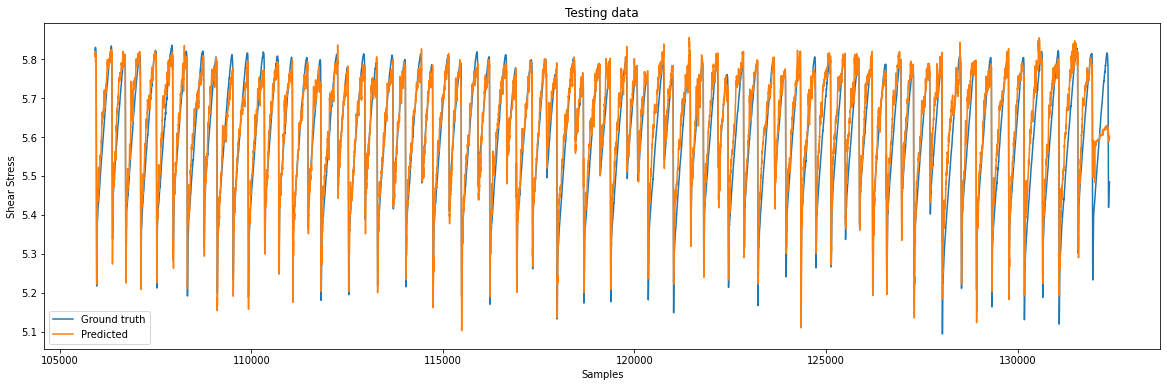

In [ ]:
# Plot the results

fig = plt.figure(1, figsize=(20,6))
plt.plot(Y_train)
plt.plot(Y_train.index, y_predTrain)
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted'])
plt.title('Training data')

fig = plt.figure(2, figsize=(20,6))
plt.plot(Y_val)
plt.plot(Y_val.index, y_predVal)
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted'])
plt.title('Validation data')

fig = plt.figure(3, figsize=(20,6))
plt.plot(y_test)
plt.plot(y_test.index, y_predTest)
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted'])
plt.title('Testing data')


Text(0.5, 1.0, '5000 Samples, Testing Data')

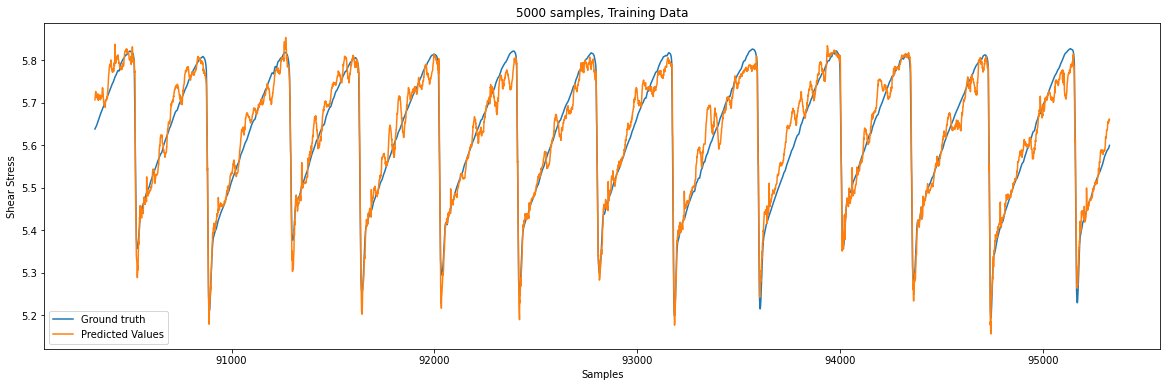

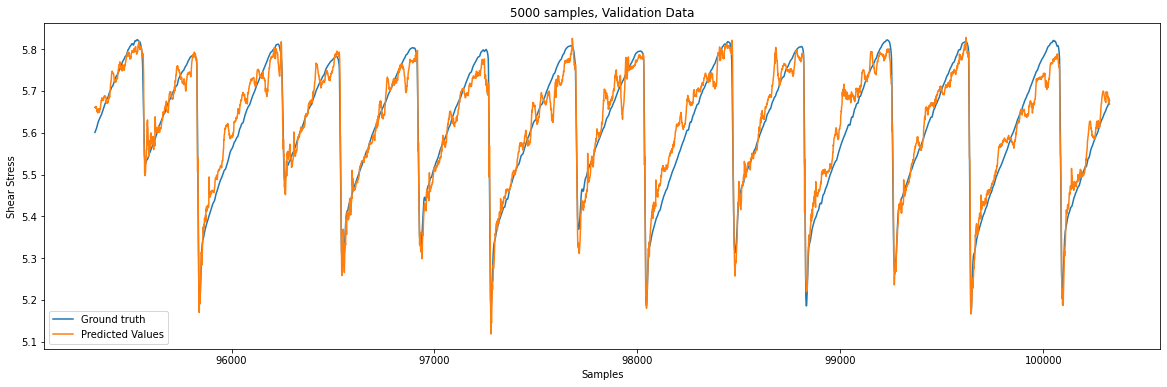

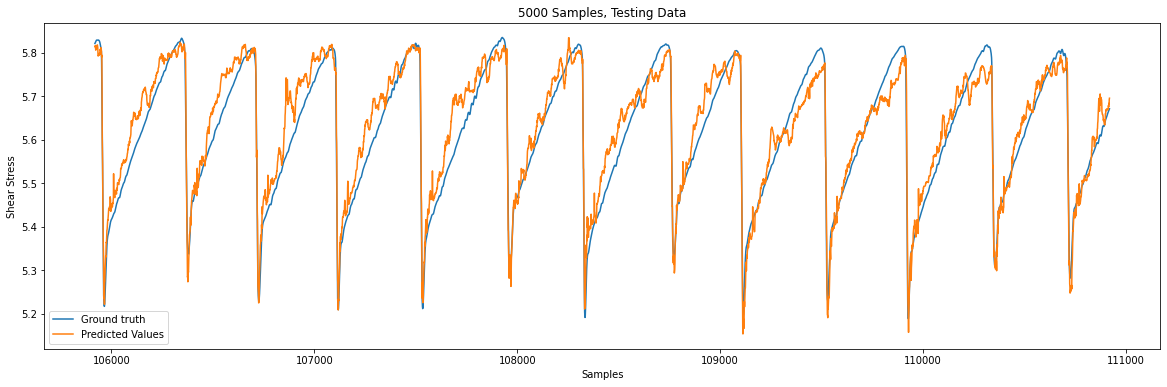

In [ ]:
# Detailed view of the plots

fig = plt.figure(4, figsize=(20,6))
plt.plot(Y_train[-5000:])
plt.plot(Y_train.index[-5000:], y_predTrain[-5000:])
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted Values'])
plt.title('5000 samples, Training Data')

fig = plt.figure(5, figsize=(20,6))
plt.plot(Y_val[0:5000])
plt.plot(Y_val.index[0:5000], y_predVal[0:5000])
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted Values'])
plt.title('5000 samples, Validation Data')

fig = plt.figure(6, figsize=(20,6))
plt.plot(y_test[:5000])
plt.plot(y_test.index[:5000], y_predTest[:5000])
plt.xlabel('Samples')
plt.ylabel('Shear Stress')
plt.legend(['Ground truth', 'Predicted Values'])
plt.title('5000 Samples, Testing Data')


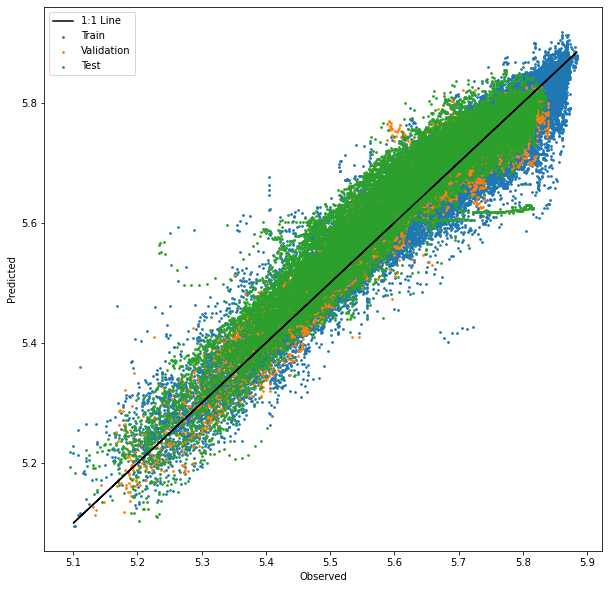

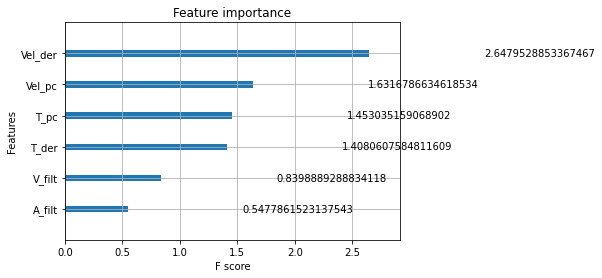

In [ ]:
# Regression analysis
fig = plt.figure(7, figsize=(10,10))
plt.plot(Y_train, Y_train, 'black')
plt.scatter(Y_train, y_predTrain, s=3)
plt.scatter(Y_val, y_predVal, s=3)
plt.scatter(y_test, y_predTest, s=3)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend(['1:1 Line','Train', 'Validation', 'Test'])

# Plot Feature importance 
plot_importance(model.get_booster().get_score(importance_type='gain'))
